In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/pdf_reports/

/content/gdrive/MyDrive/pdf_reports


In [4]:
# !git clone https://github.com/ydataai/pdf_reports

In [5]:
%cd pdf_reports

/content/gdrive/MyDrive/pdf_reports/pdf_reports


In [6]:
# !python setup.py install --user

In [7]:
!pip install pdf_reports
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.4/118.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.6/267.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 848.9/848.9 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 26.9 MB/s eta 0:00:00


In [8]:
!ls

build			  font_style.py		  precision_plot.py
calibration_curve.py	  json_files		  __pycache__
Classification.pdf	  LICENCE.txt		  pypi-readme.rst
confusion_matrix_plot.py  lift_chart.py		  README.rst
data_table.py		  MANIFEST.in		  Regression-new.pdf
dist			  multicolor_bar_plot.py  Regression.pdf
docs			  pdf_reports		  roc_curve.py
examples		  pdf_reports.egg-info	  screenshot.png
ez_setup.py		  pdp_plot.py		  setup.py
feature_importance.py	  performance_table.py	  tests


Enter color for Multi-Color Bar Plot 'setosa': brown
Enter color for Multi-Color Bar Plot 'versicolor': green
Enter color for Multi-Color Bar Plot 'virginica': red


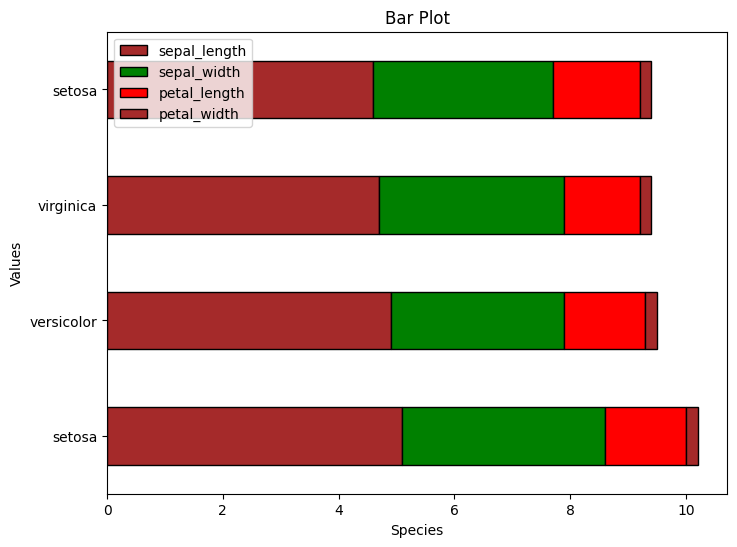

Enter color for Precision Plot - 'precision' (e.g., 'blue', '#FF5733'): green
Enter color for Precision Plot - 'recall' (e.g., 'blue', '#FF5733'): pink
Enter color for Precision Plot - 'f1' (e.g., 'blue', '#FF5733'): red
Enter color for Precision Plot - 'accuracy' (e.g., 'blue', '#FF5733'): blue


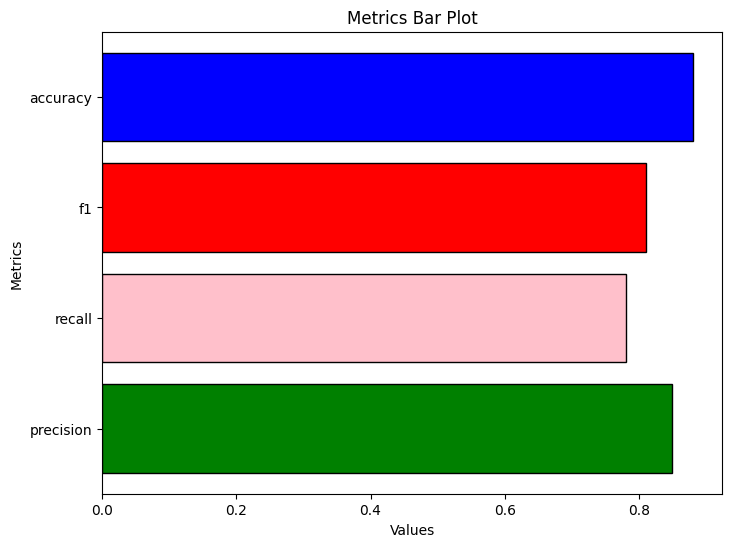

Enter colormap for confusion matrix (e.g., 'Blues', 'Greens'): Greens
Enter text color for confusion matrix (e.g., 'white', 'black'): black
Enter color for feature importance bars (e.g., 'blue', '#FF5733'): blue


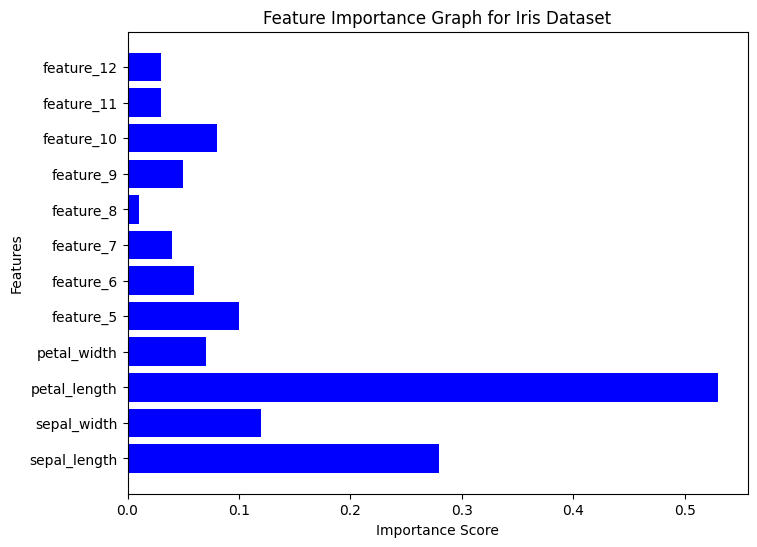

Available fonts:
1. Times New Roman
2. Arial
3. Garamond
4. Helvetica
5. Courier New
Enter the number of the font you want to choose for document (1/2/3/4/5): 1


In [9]:
from data_table import generate_centered_html_table
from performance_table import performance_table
from multicolor_bar_plot import generate_user_colored_bar_plot
from precision_plot import generate_colored_bar_plot
from confusion_matrix_plot import draw_colored_confusion_matrix_from_json
# from lift_chart import plot_lift_chart
# from pdp_plot import generate_partial_dependence_plot
# from calibration_curve import generate_calibration_curve_plot
# from roc_curve import plot_roc_curve
from feature_importance import draw_transposed_feature_importance_graph
from font_style import choose_font
from pdf_reports import pug_to_html, write_report


#Tables

data_table = generate_centered_html_table()
table_performance = performance_table()

#Plots

#Multicolor Bar Plot
with open('json_files/table.json', 'r') as file:
    data = pd.read_json(file)

dataframe = pd.json_normalize(data['data'])

multicolor_bar_image_base64 = generate_user_colored_bar_plot(dataframe, color_column='species', figsize=(8, 6))


#Precision/Recall - Performance Plot
image1_base64 = generate_colored_bar_plot()


#Confusion Matrix Plot
confusion_json_data = '[[16, 10], [3, 9]]'
user_colormap = input("Enter colormap for confusion matrix (e.g., 'Blues', 'Greens'): ")
user_text_color = input("Enter text color for confusion matrix (e.g., 'white', 'black'): ")

cm_image_base64 = draw_colored_confusion_matrix_from_json(confusion_json_data, cmap=user_colormap, text_color=user_text_color, figsize=(8, 6))

# # Lift Chart
# lift_json_data = "[[1, 0.0], [14, 1.583], [27, 1.055], [40, 0.792], [53, 0.633], [66, 0.528], [79, 0.905], [93, 0.792], [106, 1.056], [119, 1.267], [132, 1.152], [145, 1.056], [158, 0.974], [172, 1.131], [185, 1.267], [198, 1.385], [211, 1.49], [224, 1.407], [237, 1.5], [250, 1.583], [264, 1.659], [277, 1.583], [290, 1.652], [303, 1.583], [316, 1.52], [329, 1.462], [343, 1.407], [356, 1.357], [369, 1.31], [382, 1.267], [395, 1.226], [408, 1.187], [422, 1.152], [435, 1.118], [448, 1.086], [461, 1.056], [474, 1.027], [487, 1.0]]"

# lift_image_base64 = plot_lift_chart(lift_json_data, figsize=(8, 6))

# # PDP Plot
# pdp_json_data = "[[0.1, 0.6117971813559571], [0.2, 0.6026725563085955], [0.3, 0.5934052957223059], [0.4, 0.5839950775994142], [0.5, 0.5744423336342395], [0.6, 0.5647482932111433], [1.0, 0.5246135281770129], [1.1, 0.5142615183634337], [1.2, 0.5037938605649355], [1.224761904761905, 0.5011848428639888], [1.3, 0.4932179566784029], [1.4, 0.48254207421133255], [1.5, 0.47177531658208943], [1.6, 0.46092758519930577], [1.7, 0.45000953366087043], [1.8, 0.4390325145010251], [1.9, 0.42800851899668035], [2.0, 0.4169501106203865], [2.1, 0.4058703527968349], [2.2, 0.39478273168192574], [2.3, 0.3837010747380738], [2.4, 0.37263946592633473], [2.5, 0.3616121583749748]]"

# pdp_plot_base64 = generate_partial_dependence_plot(pdp_json_data, figsize=(8, 6))

# #Calibration Curve
# calibration_json_data = "[[0.0775025736941102, 0.0], [0.12531744389947905, 0.0], [0.2529160242139393, 0.0], [0.35479802531935456, 0.0], [0.46220339839460656, 0.75], [0.5418798382539232, 0.8], [0.6594757683346523, 0.3333333333333333], [0.7350070794640287, 0.6], [0.8497322903801688, 0.2], [0.9185066565063702, 0.0]]"

# calibration_curve_base64 = generate_calibration_curve_plot(calibration_json_data, figsize=(10, 8))

# #ROC Curve
# roc_json_file_path = "json_files/roc_curve.json"  # Replace with the actual path of your JSON file
# roc_base64_plot = plot_roc_curve(roc_json_file_path)

#Feature Importance Plot
feature_json_file_path = "json_files/feature_importance.json"
user_bar_color = input("Enter color for feature importance bars (e.g., 'blue', '#FF5733'): ")
feature_importance_base64_plot = draw_transposed_feature_importance_graph(feature_json_file_path, bar_color=user_bar_color)


#Font Style
selected_font = choose_font()

#PDF Generation
html = pug_to_html(r"./examples/working_example/page2.html",
                   font_style= selected_font,
                   title="Classification in Machine Learning",
                   author="Ali Zeeshan",
                   table1=data_table,
                   table2=table_performance,
                   multicolor_bar_plot = multicolor_bar_image_base64,
                   metrics_bar_plot = image1_base64,
                   confusion_metrics_plot = cm_image_base64,
                  #  lift_plot = lift_image_base64,
                  #  pdp_plot = pdp_plot_base64,
                  #  calibration_plot = calibration_curve_base64,
                  #  roc_plot = roc_base64_plot,
                   feature_importance_plot = feature_importance_base64_plot

                   )

write_report(html, "Classification-new.pdf")